# Corrections

## Système linéaire invariant

### Exercice 1

La réponse impulsionnelle $h$ d'un système linéaire invariant
est par définition la sortie de ce système à une impulsion.
Par ailleurs, si l'entrée $x$ du système est un signal échantillonné
alors elle peut s'écrire comme une somme d'impulsions :

$$
x[n] = \sum_{m} x[m] \delta[n-m].
$$

Ainsi, en notant $\mathcal{S}$ l'effet du système, sa sortie a pour expression :

$$
y[n] &= \mathcal{S}\left(x[n]\right) \\
     &= \mathcal{S}\left(\sum_{m} x[m] \delta[n-m]\right) \\
     &= \sum_{m} \mathcal{S}(x[m] \delta[n-m]) &&\text{(par linéarité)} \\
     &= \sum_{m} x[m] \mathcal{S}(\delta[n-m]) &&\text{(par linéarité, $x[m]$ étant une constante)} \\
     &= \sum_{m} x[m] h[n-m] &&\text{(par invariance)} \\
     &= (x*h)[n] \\
$$

### Exercice 2

La réponse fréquentielle du système de réponse impulsionnelle $h$,
qui s'obtient en calculant la transformée de Fourier, est :

$$
H(f) = \frac{1}{1+j2\pi f}
$$

dont on peut déduire le gain et la phase :

$$
20\log_{10}|H(f)| = -10\log_{10}\left(1+4\pi^2 f^2\right)
\qquad
\mathrm{Arg}(H(f)) = \mathrm{arctan}(-2\pi f).
$$

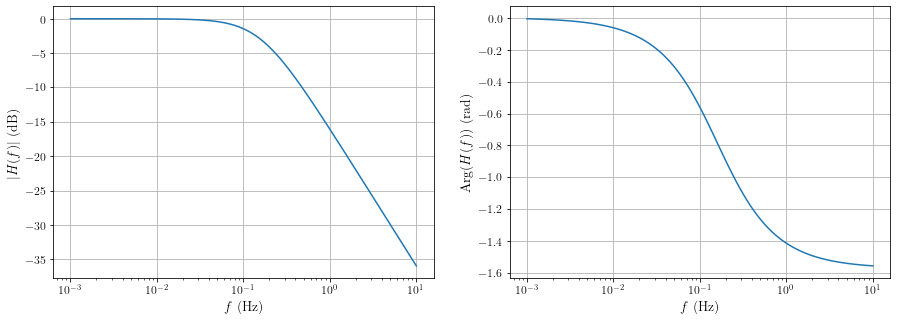

In [9]:
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('../signal.mplstyle')

#f = np.arange(0, 10, .01)
f = np.logspace(-3, 1, 100)
H = 1 / (1+1j*2*np.pi*f)

fig, axs = plt.subplots(1,2, figsize=(15,5))
axs[0].semilogx(f, 20*np.log10(abs(H)))
axs[0].set_xlabel("$f$ (Hz)")
axs[0].set_ylabel("$|H(f)|$ (dB)")
axs[1].semilogx(f, np.angle(H))
axs[1].set_xlabel("$f$ (Hz)")
axs[1].set_ylabel("Arg$(H(f))$ (rad)")
plt.show()

## Conception d'un gabarit

### Exercice 3

```{figure} figs-ex3.png
```

### Exercice 4

```{figure} figs-ex4.png
```

### Exercice 5

```{figure} figs-ex5.png
```
  
### Exercice 6

```{figure} figs-ex6.png
```


## Transformées de Laplace et en Z

### Exercice 7

L'ordre correspond au nombre de pôles.
Le type (analogique ou numérique) se voit grâce
au lieu de la transformée de Fourier (continue ou discrète) :
une barre verticale sur l'axe des ordonnées correspond à un système analogique,
le cercle unité correspond à un système numérique.

```{list-table}
:header-rows: 1  
  
* -
  - Pôles
  - Zéros
  - Ordre
  - Type
* - A
  - $-3-4j$ <br/> $-3+4j$
  - Aucun zéro
  - 2
  - Analogique
* - B
  - $-\frac{1}{2}j$ <br/> $+\frac{1}{2}j$
  - -2
  - 2
  - Numérique
* - C
  - $0,81+1,05j$ <br/> $0,81-1,05j$ <br/> $-0,25+0,48j$ <br/> $-0,25-0,48j$ <br/> $-1,11$
  - $0,18+0,86j$ <br/> $0,18-0,86j$ <br/> $-0,43$ <br/> $-6$
  - 5
  - Numérique  
```

### Exercice 8

Le calcul de la transformée de Laplace peut nécessiter de calculer
la limite en $t \to +\infty$ d'une exponentielle.
Dans ce cas, il faut séparer l'exponentielle en deux :
* une exponentielle réelle qui va converger vers 0 selon certaines valeurs de la partie réelle $\sigma$ de $s$ ;
* une exponentielle complexe qui est bornée (mais non convergente).
Il peut y avoir plusieurs conditions sur $\sigma$ s'il y a plusieurs limites à calculer.
La condition la plus forte définit le plan de convergence, où la transformée de Laplace converge.

Réponse impulsionnelle $h_1$ :

$$H_1(s) = \frac{3}{s+2} - \frac{2}{s+1} \quad\text{si}\; \sigma>-2$$

La région de convergence correspond au plan complexe où la partie réelle de $s$ est supérieure à $-2$.
$H_1$ possède deux pôles ($-1$ et $-2$) et un zéro ($1$).
Les pôles sont à partie réelle négative : le système est donc stable.

Réponse impulsionnelle $h_2$ :

$$H_2(s) = \frac{1}{2}\frac{1}{s+1-3j} + \frac{1}{2}\frac{1}{s+1+3j} \quad\text{si}\; \sigma>-1$$

La région de convergence correspond au plan complexe où la partie réelle de $s$ est supérieure à $-1$.
$H_2$ possède deux pôles ($-1+3j$ et $-1-3j$) et un zéro ($-1$).
Les pôles sont à partie réelle négative : le système est donc stable.

### Exercice 9

Le calcul de la transformée en Z peut nécessiter de calculer
la limite en $n \to +\infty$ d'une fonction de $z$.
Cette limite est finie en imposant une certaine condition sur le module de $z$.
S'il y a plusieurs conditions pour obtenir une transformée en Z convergente,
alors la condition la plus forte définit le plan de convergence, où la transformée en Z converge.

Réponse impulsionnelle $h_1$ :

$$H_1(z) = \frac{7}{1-\frac{1}{3}z^{-1}} \quad\text{si}\; |z|>\frac{1}{3}$$

La région de convergence correspond au plan complexe où le module de $z$ est supérieur à $\frac{1}{3}$.
$H_1$ possède un seul pôle ($1/3$) et aucun zéro.
Le pôle est dans le cercle unité : le système est donc stable.

Réponse impulsionnelle $h_2$ :

$$H_2(z) = \frac{1}{2j}\frac{1}{1-2e^{j\pi/4}z^{-1}} - \frac{1}{2j}\frac{1}{1-2e^{-j\pi/4}z^{-1}} \quad\text{si}\; |z|>2$$

La région de convergence correspond au plan complexe où le module de $z$ est supérieur à $2$.
$H_2$ possède deux pôles ($2e^{j\pi/4}$ et $2e^{-j\pi/4}$) et un zéro ($0$).
Les pôles sont en dehors du cercle unité : le système est donc instable.

### Exercice 10

Après avoir décomposé les fonctions de transfert en éléments simples,
on peut utiliser les tables pour trouver les transformées de Laplace inverser, et donc :

$$
h_1(t) = (e^{-t}-e^{-2t})u(t),
\qquad
h_2(t) = \left( \cos(\sqrt{2}t) - \frac{3}{\sqrt{2}}\sin(\sqrt{2}t) \right) u(t).
$$

### Exercice 11

$$
h_1[n] = -2^n u[-n-1],
\qquad
h_2[n] = 2n2^n u[n].
$$
### Exercice 12

Les deux filtres sont d'ordre 1. En les combinant, on obtient un filtre d'ordre 2 de fonction de transfert :

$$H(s) = H_1(s) \times H_2(s) = \frac{1}{a_1s+a_0}\frac{1}{b_1s+b_0}.$$

En ajoutant un troisième filtre d'odre 1, on obtient un filtre d'ordre 3.

## Filtres numériques

### Exercice 13

```{figure} forme-directe-sys3.svg
---
width: 450px
```

```{figure} forme-directe-sys4.svg
---
width: 100%
```

### Exercice 14

$$
  H_1(s) = \frac{ 1 + 2z^{-1} z^{-2} }{ 1 + z^{-1} }
$$

$$
  H_2(z) = \frac{ 1 - \frac{7}{4}z^{-1} - \frac{1}{2}z^{-2} }{ 1 + \frac{1}{4}z^{-1} - \frac{1}{8}z^{-2} }
$$


### Exercice 15

```{figure} figs-ex15.jpg
---
width: 100%
```

Le filtre étant synthétisé avec la méthode des fenêtres, c'est un filtre RIF et il est donc forcément stable.

Les fenêtres envisageables sont les fenêtres de Hamming, Blackman et Kaiser.

La fenêtre de Kaiser, avec $\beta=4,538$ par exemple, donnera l'ordre le plus faible.
Sa largeur de transition est $2,93/N$ et doit être égale à $10/120$ :
on obtient donc un ordre $N=36$.

## Filtres analogiques

### Exercice 16

Ce filtre est un passe-bas.
Il n'y a pas d'oscillation ni en bande passante ni en bande atténuée :
c'est un filtre de Butterworth ou de Bessel.
Sa fréquence de couure est de 0,2 Hz.
  
### Exercice 17

Ce filtre est un passe-bande.
Il y a des oscillations en bande passante mais pas en bande atténuée :
c'est un filtre de Tchebychev de type I.
Ses fréquences de couure sont 0,5 et 15 Hz.